# Implementation of different loss functions

## Assignment 1 (Deadline : 15/10/2020 11:59PM)

### Q1 : Loss Functions (30 points)

Implement the following loss functions using numpy (each function should take two numpy arrays as arguments and return the value of the loss):

1. Huber Loss (10 points)
2. Hinge Loss (10 points)
3. Cross Entropy Loss (10 points)

In [1]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def huber_loss(y, ypred, delta = 5.0):
    """
    This function calculates huber loss between y and ypred conditioned by the parameter delta
    
    Args:
        y: column vector of ground truth labels with each row containing a single example
        ypred: column vector of predictions with each row containing a single example
        delta: scalar value 
    Returns:
        hinge loss 
    """
    abs_diff = np.abs(y - ypred)
    mask = (abs_diff <= delta)
    
    squared_loss = 0.5 * np.sum(np.square(abs_diff[mask]))
    linear_loss = np.sum(delta * abs_diff[~mask] - 0.5 * delta ** 2) 
    
    total_loss = (squared_loss + linear_loss) / y.shape[0]
                           
    return total_loss

In [3]:
# define test arrays for huber loss
y = np.array([4, 9, 9, 5, 10])
ypred = np.array([3, 4, 5, 6, 7])

print(f" Huber Loss with delta {3} is: {huber_loss(y, ypred, delta = 3)}")
print(f" Huber Loss with delta {5} is: {huber_loss(y, ypred, delta = 5)}")

 Huber Loss with delta 3 is: 4.7
 Huber Loss with delta 5 is: 5.2


In [4]:
def hinge_loss(y, ypred):
    """
    This function calculates hinge loss between y and ypred
    
    Args:
        y: column vector of ground truth labels with each row containing a single example
        ypred: column vector of predictions with each row containing a single example
        
    Returns:
        hinge loss 
    """
    return np.sum(np.maximum(0, 1 - ypred * y)) / y.shape[0]

In [5]:
# define test arrays for hinge loss
y = np.array([1, -1, -1, 1, 1])
ypred = np.array([-0.3, -0.5, 6.6, 0.2, 0.9])

print(f"Hinge Loss: {hinge_loss(y, ypred)}")

Hinge Loss: 2.06


In [6]:
def cross_entropy_loss(y, ypred):
    """
    This function calculates cross entropy loss between y and ypred
    
    Args:
        y: column vector of ground truth labels with each row containing a single example
        ypred: column vector of predictions with each row containing a single example
        
    Returns:
        cross entropy loss 
    """
    d = 1e-15  # to avoid taking log of zero
    return -1 * (np.dot(y.T, np.log2(ypred + d)) + np.dot((1 - y).T, np.log2((1 - ypred + d)))) / y.shape[0]

In [7]:
# define test array for cross entropy loss
y = np.array([1, 0, 0, 1, 1])
ypred = np.array([0.2, 0.5, 0, 0.7, 0.05])

print(f"Cross Entropy Loss: {cross_entropy_loss(y, ypred)}")

Cross Entropy Loss: 1.631685872520888


### Q2 : Visualizing Taylor Series (10 points)

Taylor series for a function $f(x)$ about $x=a$ is :
$$\begin{align*}f\left( x \right) & = \sum\limits_{n = 0}^\infty {\frac{{{f^{\left( n \right)}}\left( a \right)}}{{n!}}{{\left( {x - a} \right)}^n}} \\ & = f\left( a \right) + f'\left( a \right)\left( {x - a} \right) + \frac{{f''\left( a \right)}}{{2!}}{\left( {x - a} \right)^2} + \frac{{f'''\left( a \right)}}{{3!}}{\left( {x - a} \right)^3} + \cdots \end{align*}$$

Visualize the 1st, 2nd and 4th order Taylor series approximation for cos(x) at $x=0$


### Taylor series expansion of $f = cos(x)$ about x = 0.  
- $f'(0) = -sin(0) = 0$, $f"(0) = -cos(0) = -1 $
- $f{^3}(0) = sin(0) = 0$, $f{^4}(0) = cos(0) = 1$
- So Taylor series expansion given above becomes $$cos(x) = 1 - \frac{x{^2}}{2!} + \frac{x{^4}}{4!} - \frac{x{^6}}{6!} +  \frac{x{^8}}{8!} -...$$

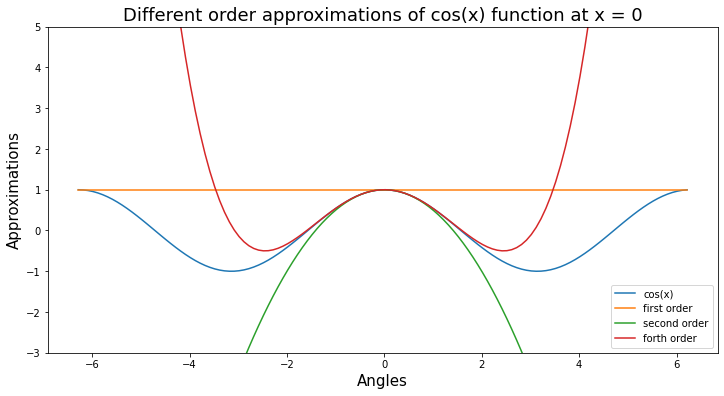

In [8]:
# angles for calculating values of cos(x)
angles = np.arange(-2 * np.pi, 2 * np.pi, 0.1)    
cos_x = np.cos(angles)

# figure object to display
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(angles, cos_x)

# set y axis limits
ax.set_ylim([-3, 5])

# first order approximation of cos(x) includes only constant term 1
first_order = [1] * len(angles)
ax.plot(angles, first_order)

# second order approximation of cos(x)
second_order = 1 - (0.5 * angles ** 2)
ax.plot(angles, second_order)

# forth order approximation of cos(x)
forth_order = 1 - (0.5 * angles ** 2) + (angles ** 4) / 24
ax.plot(angles, forth_order)

labels = ['cos(x)', 'first order', 'second order', 'forth order']
ax.set_xlabel('Angles', fontsize = 15)
ax.set_ylabel('Approximations', fontsize = 15)
ax.set_title('Different order approximations of cos(x) function at x = 0', fontsize = 18)
ax.legend(labels, loc = 4)
plt.show()

### Q3 : Visualising Loss surface in weight space (20 points)

Consider a loss function defined in terms of weights w1 and w2 as : $$ J = \frac{1}{2}[(w_1 - w_2)^2 + (25 - w_1)^2]$$

1. Plot the loss surface in the weight space $w_1$ and $w_2$  (10 points)
2. At any three points, plot the direction of the gradient at that point (10 points)

### Gradient of cost function w.r.t. parameters w1, w2
- $\frac{\partial{J}}{w1}$ = $2w1 - w2 - 25$
- $\frac{\partial{J}}{w2}$ = $w2 - w1$

In [9]:
def cal_grad(w1, w2):
    """
    This function will calculate the gradient of cost w.r.t. parameters
    
    Args:
        w1: value of parameter w1
        w2: value of parameter w2
        
    Returns:
        grad_w1: gradient of cost w.r.t. parameter w1
        grad_w2: gradient of cost w.r.t. parameter w2
    """
    grad_w1 = 2 * w1 - w2 - 25
    grad_w2 = w2 - w1
    return grad_w1, grad_w2

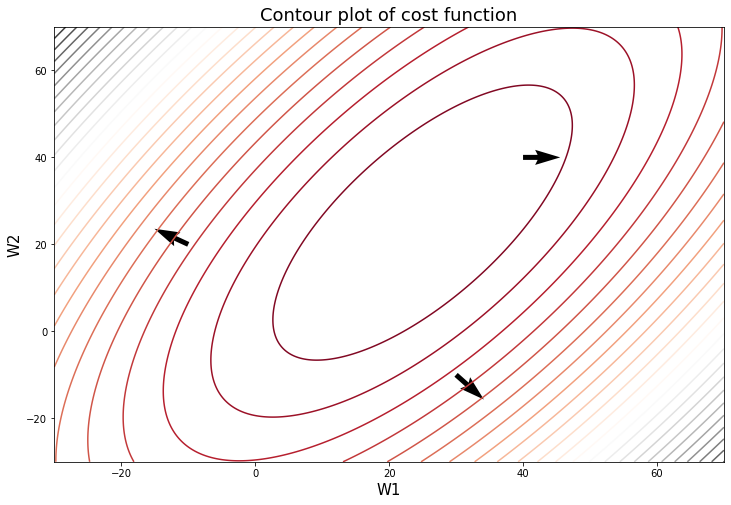

In [10]:
w1 = np.array([np.linspace(-30, 70, 1000)])    # values of w1
w2 = np.array([np.linspace(-30, 70, 1000)])    # values of w2

# coordinates for plotting
X, Y = np.meshgrid(w1, w2) 

# calculate cost at each point
cost_array = 0.5 * ((X - Y) ** 2 + (25 - X) ** 2)

fig, ax = plt.subplots(figsize = (12, 8))

ax.contour(X, Y, cost_array, cmap = 'RdGy', levels = 30)
ax.set_title('Contour plot of cost function', fontsize = 18)
ax.set_xlabel('W1', fontsize = 15)
ax.set_ylabel('W2', fontsize = 15)

# plot gradient direction at any 3 points
grad1, grad2 = cal_grad(-10, 20)
ax.quiver(-10, 20, grad1, grad2)

grad3, grad4 = cal_grad(40, 40)
ax.quiver(40, 40, grad3, grad4)

grad3, grad4 = cal_grad(30, -10)
ax.quiver(30, -10, grad3, grad4)
plt.show()